In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
file_path = '../dataset/forecasting_rainfall_dataset.xlsx'
data = pd.read_excel(file_path)
data

,Tanggal,Suhu Minimum (°C),Suhu Maksimum (°C),Suhu Rata-rata (°C),Kelembaban Rata-rata (%),Lama Penyinaran (jam),Kecepatan Angin Rata-rata (knot),Kecepatan Angin Terbesar (knot),Arah Angin Saat Kecepatan Maksimum (deg),Curah Hujan (mm),Kategori Hujan (num),Arah Angin Terbanyak (deg),Curah Hujan (Kategori)
0,01/02/2008,24.0,30.1,26.1,82,2.3,3,5,270,0.0,0,N,TIDAK HUJAN/BERAWAN
1,02/02/2008,24.0,31.0,26.3,90,1.0,2,4,180,0.0,0,S,TIDAK HUJAN/BERAWAN
2,03/02/2008,22.6,30.8,26.0,86,0.3,2,3,270,58.2,3,W,HUJAN LEBAT
3,04/02/2008,22.8,33.4,26.9,84,0.9,2,3,270,0.6,1,N,HUJAN RINGAN
4,05/02/2008,23.0,32.4,26.9,86,5.0,2,2,315,5.3,1,NW,HUJAN RINGAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,12/12/2018,24.8,34.0,28.5,81,1.0,1,2,230,0.0,0,N,TIDAK HUJAN/BERAWAN
3630,17/12/2018,24.2,34.8,28.4,76,5.1,2,3,130,0.0,0,S,TIDAK HUJAN/BERAWAN
3631,18/12/2018,24.4,34.7,27.6,76,6.1,1,4,270,1.8,1,W,HUJAN RINGAN
3632,19/12/2018,23.8,34.6,28.5,75,8.0,1,2,220,61.0,3,S,HUJAN LEBAT


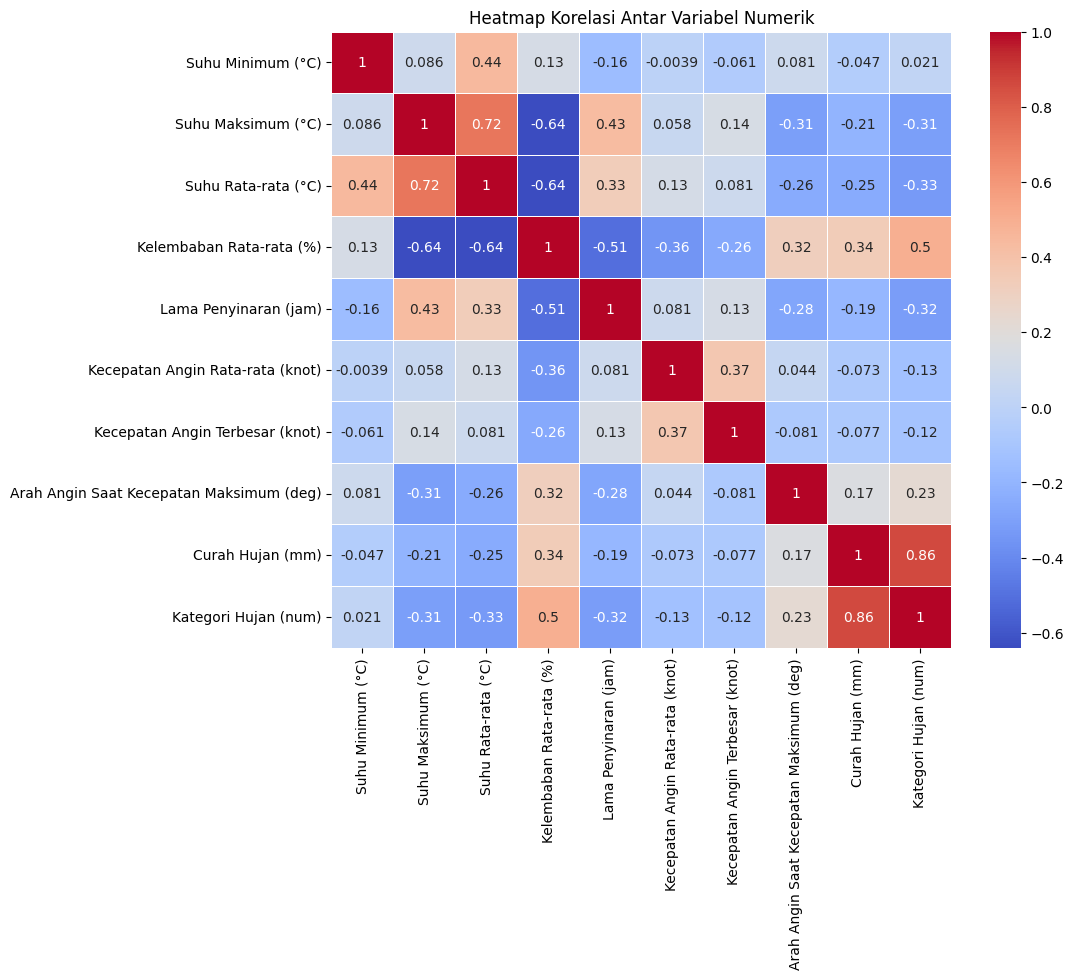

In [3]:
# Memilih kolom-kolom numerik saja
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menampilkan plot
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

In [4]:
data['Curah Hujan (Kategori)'].unique()

array(['TIDAK HUJAN/BERAWAN', 'HUJAN LEBAT', 'HUJAN RINGAN',
       'HUJAN SEDANG', 'HUJAN SANGAT LEBAT'], dtype=object)

In [5]:
data['Kategori Hujan (num)'].unique()

array([0, 3, 1, 2, 4])

In [6]:
df = data[['Suhu Minimum (°C)', 'Kelembaban Rata-rata (%)', 'Lama Penyinaran (jam)', 'Kategori Hujan (num)']]
df

,Suhu Minimum (°C),Kelembaban Rata-rata (%),Lama Penyinaran (jam),Kategori Hujan (num)
0,24.0,82,2.3,0
1,24.0,90,1.0,0
2,22.6,86,0.3,3
3,22.8,84,0.9,1
4,23.0,86,5.0,1
...,...,...,...,...
3629,24.8,81,1.0,0
3630,24.2,76,5.1,0
3631,24.4,76,6.1,1
3632,23.8,75,8.0,3


In [7]:
# Mendefinisikan kondisi untuk pengelompokan kategori
conditions = [
    (data['Kategori Hujan (num)'] == 0),  # TIDAK HUJAN/BERAWAN (0)
    (data['Kategori Hujan (num)'] == 1) | (data['Kategori Hujan (num)'] == 2),  # HUJAN RINGAN (1), HUJAN SEDANG (2)
    (data['Kategori Hujan (num)'] == 3) | (data['Kategori Hujan (num)'] == 4)   # HUJAN LEBAT (3), HUJAN SANGAT LEBAT (4)
]

# Definisikan hasil berdasarkan kondisi
values = [0, 1, 2]

# Membuat kolom baru dengan gruping kategori hujan
data['Kategori Hujan (Group)'] = np.select(conditions, values)

# Menampilkan data baru
df = data[['Suhu Minimum (°C)', 'Kelembaban Rata-rata (%)', 'Lama Penyinaran (jam)', 'Kategori Hujan (Group)']]
df

,Suhu Minimum (°C),Kelembaban Rata-rata (%),Lama Penyinaran (jam),Kategori Hujan (Group)
0,24.0,82,2.3,0
1,24.0,90,1.0,0
2,22.6,86,0.3,2
3,22.8,84,0.9,1
4,23.0,86,5.0,1
...,...,...,...,...
3629,24.8,81,1.0,0
3630,24.2,76,5.1,0
3631,24.4,76,6.1,1
3632,23.8,75,8.0,2


In [8]:
df = df.dropna(axis='rows')

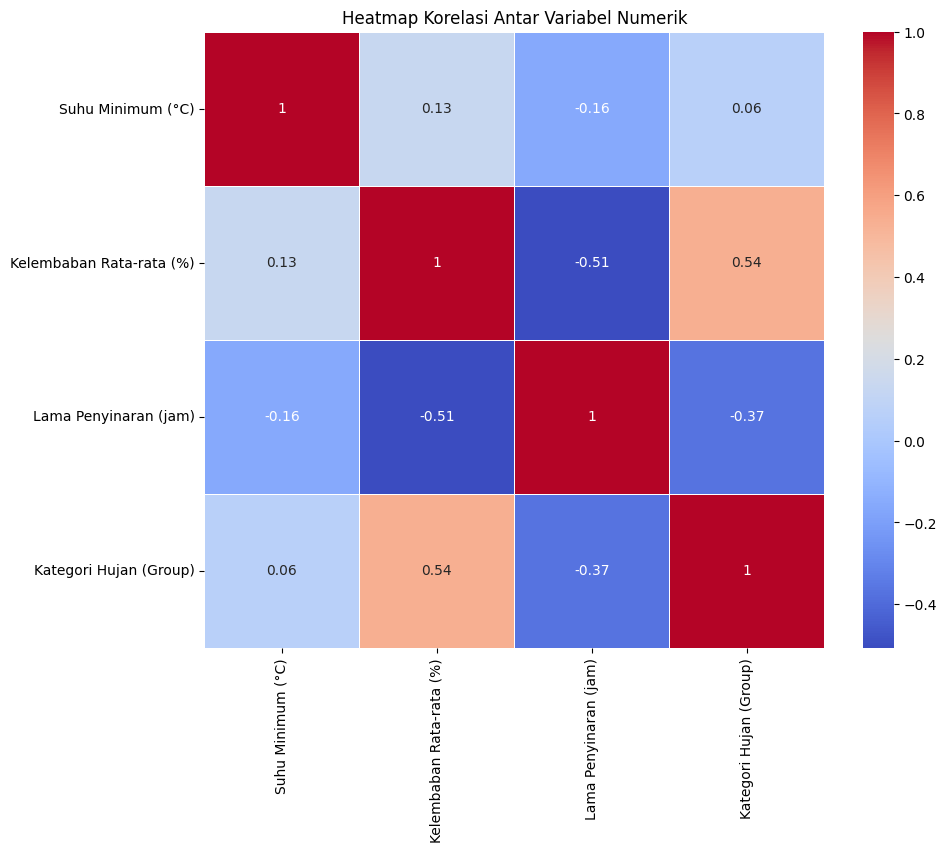

In [9]:
# Memilih kolom-kolom numerik saja
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menampilkan plot
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

In [10]:
# Buat mapping warna untuk tiap kategori grup hujan
color_map = {0: 'yellow', 1: 'green', 2: 'red'}

# Mapping warna ke grup hujan
colors = df['Kategori Hujan (Group)'].map(color_map)

# Buat plot 3D dengan warna berdasarkan kategori grup hujan
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Suhu Minimum (°C)'],
    y=df['Kelembaban Rata-rata (%)'],
    z=df['Lama Penyinaran (jam)'],
    mode='markers',
    marker=dict(color=colors, size=5),
    text=df['Kategori Hujan (Group)']
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Suhu Minimum (°C)',
        yaxis_title='Kelembaban Rata-rata (%)',
        zaxis_title='Lama Penyinaran (jam)'
    ),
    scene_camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64)),
    width=1000, height=600,
    title='Visualisasi 3D dengan Warna Berdasarkan Kategori Hujan'
)

# Tampilkan plot
fig.show()

In [11]:
X = df[['Suhu Minimum (°C)', 'Kelembaban Rata-rata (%)', 'Lama Penyinaran (jam)']].to_numpy()
y = df[['Kategori Hujan (Group)']].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

In [12]:
model = SVC(gamma=0.0000001, kernel='rbf')
model.fit(X_train, y_train)

/Users/ahmadrifai/Research/smart-weathering-polindra/micro-ai/vir/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma=1e-07)

In [13]:
training_predict = model.predict(X_train)
metrics.classification_report(y_train, training_predict, digits = 3)

/Users/ahmadrifai/Research/smart-weathering-polindra/micro-ai/vir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ahmadrifai/Research/smart-weathering-polindra/micro-ai/vir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ahmadrifai/Research/smart-weathering-polindra/micro-ai/vir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



'              precision    recall  f1-score   support\n\n           0      0.593     1.000     0.745      1508\n           1      0.000     0.000     0.000       940\n           2      0.000     0.000     0.000        95\n\n    accuracy                          0.593      2543\n   macro avg      0.198     0.333     0.248      2543\nweighted avg      0.352     0.593     0.441      2543\n'

In [14]:
metrics.confusion_matrix(y_train, training_predict)

array([[1508,    0,    0],
       [ 940,    0,    0],
       [  95,    0,    0]])

In [15]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_train, training_predict)*100,2)}%')

Model accuracy: 59.3%


In [16]:
# Generate grid points untuk Suhu, Kelembaban, dan Penyinaran
x_grid, y_grid = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100), 
                             np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))

# Z-axis will correspond to Lama Penyinaran
z_grid = np.zeros_like(x_grid)

# Menghitung fungsi keputusan (decision function) untuk setiap titik di grid
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        z_grid[i, j] = model.decision_function([[x_grid[i, j], y_grid[i, j], 0]]).ravel()[0]  # Anda dapat mengganti 0 dengan nilai z (lama penyinaran) yang relevan.

In [17]:
# Scatter plot for the training data
fig = go.Figure()

# Menambahkan data asli dalam bentuk scatter 3D
fig.add_trace(go.Scatter3d(x=X_scaled[:, 0], y=X_scaled[:, 1], z=X_scaled[:, 2], 
                           mode='markers',
                           marker=dict(size=5, color=y.ravel(), opacity=0.7, colorscale='Viridis'),
                           name='Data Training'))

# Menambahkan surface plot untuk decision boundary
fig.add_trace(go.Surface(z=z_grid, x=x_grid, y=y_grid, opacity=0.5, colorscale='Bluered_r', showscale=False))

# Menentukan layout untuk axis dan tampilan
fig.update_layout(scene=dict(xaxis_title='Suhu Minimum (°C)',
                             yaxis_title='Kelembaban Rata-rata (%)',
                             zaxis_title='Lama Penyinaran (jam)'),
                 width=1000, height=600)

# Menampilkan grafik
fig.show()